# **Capstone Project 2**
***Course - Applied Data Science with Python***

Student Name - Santanu Chandra

email: santanu.chandra@gmail.com

Submission date - 06-20-2025

# **1. Project Statement**
AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.
Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities.

To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department. The specific tasks include:
1.	Identify the states that are generating the highest revenues.
2.	Develop sales programs for states with lower revenues. The head of sales and marketing has requested your assistance with this task.

Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

*Enclosed is the CSV (AusApparalSales4thQrt2020.csv) file that covers the said data.



# **2. Data Collection**
2.1 Import libraries for data analysis

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

2.2 Import the data file

In [57]:
# Load the dataset
sales_df = pd.read_csv('AusApparalSales4thQrt2020.csv')

# **3. Data Exloration and Analysis**
We will conduct comprehensive Exploratory Data Analysis (EDA) of the Sales Dataset

# **3.1 Data Overview**

In [58]:
# Display basic row and column information
print(f"Dataset size : {sales_df.shape}")

Dataset size : (7560, 6)


In [59]:
# Understand Dataset columns and Memory usage
sales_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 2.0 MB


In [60]:
# Display the first 10 rows of the dataframe
sales_df.head(10)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
5,1-Oct-2020,Afternoon,WA,Men,10,25000
6,1-Oct-2020,Afternoon,WA,Women,3,7500
7,1-Oct-2020,Afternoon,WA,Seniors,11,27500
8,1-Oct-2020,Evening,WA,Kids,15,37500
9,1-Oct-2020,Evening,WA,Men,15,37500


# **3.2 Data Types**

In [61]:
# Display basic information on Categorical and Numerical Data
data_types = sales_df.dtypes
print(data_types)

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object


In [62]:
data_types.value_counts()

,count
object,4
int64,2


In [63]:
# Find the unique values of Date
unique_dates = sales_df['Date'].unique()
print(unique_dates)

['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 '11-Dec-2020' '12-Dec-2020' '13-

In [64]:
# Find the unique values of Time
unique_times = sales_df['Time'].unique()
print(unique_times)

[' Morning' ' Afternoon' ' Evening']


In [65]:
# Find the unique values of State
unique_states = sales_df['State'].unique()
print(unique_states)


[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']


In [66]:
# Find the unique values of Group
unique_groups = sales_df['Group'].unique()
print(unique_groups)

[' Kids' ' Men' ' Women' ' Seniors']


**Observations**

*   There are 6 columns. 2 are Numerical type and 4 categorical type
*   Categorical types are Date, Time, State and Group
*   Numerical Types are Unit, Sales
*   Total number of data points = 1760
*   Size of data = 2 MB (Manageable)
*   Units sold and sales data obtained from
      1.   6 states (WA,NT,SA,VIC, QLD, NSW, TAS)
      2.   3 months (Oct, Nov and Dec)
      3.   4 Groups (Kids,Men,Women,Seniors)
      4.   3 Times of sale (Morning, Afternoon,Evening)









# **3.3 Data Wrangling**
**3.3.1 Inspect the dataset for missing values**



In [67]:
# Check for Missing Values
missing_values = sales_df.isnull()
print(missing_values)

       Date   Time  State  Group   Unit  Sales
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
7555  False  False  False  False  False  False
7556  False  False  False  False  False  False
7557  False  False  False  False  False  False
7558  False  False  False  False  False  False
7559  False  False  False  False  False  False

[7560 rows x 6 columns]


In [68]:
# Check for Missing Values
missing_values = sales_df.isnull().sum()
print("Missing Values in each Categories")
print(missing_values)

Missing Values in each Categories
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [69]:
# Check for missing values
total_missing_values = sales_df.isna().sum().sum()
# total_missing_values = missing_values.sum()
print(f"Total Missing Values : {total_missing_values}")

Total Missing Values : 0


In [70]:
# IF missing values are found we drop the rows missing value
# Drop rows with any NaN values
sales_df_cleaned = sales_df.dropna()
print(sales_df_cleaned)

## Drop columns with any NaN values
#df_cleaned_columns = df.dropna(axis=1)
#print(df_cleaned_columns)


             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


**3.3.2 Inspect the dataset for duplicate values**

In [71]:
# Check for duplicates
duplicate_rows = sales_df.duplicated()
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
7555    False
7556    False
7557    False
7558    False
7559    False
Length: 7560, dtype: bool


**Observations:**
*   No missing values. No need to treat missing values
*   No duplicate values



**3.3.3 Basic understanding of the data**

In [72]:
# Display basic statsitics for Numerical COlumns
sales_df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


**Observations**

About Unit Sold
*   Mean Units sold is 18
*   Max units sold is 65
*   Min Unit sold is 2
*   Units sold distribution is right skewed with a long tail in the right


About Sales
*   Mean Sales is $45,013

*   Max Sales is $162,500

*   Min sales is $5000

*   Sales distribution is right skewed with a long tail in the right




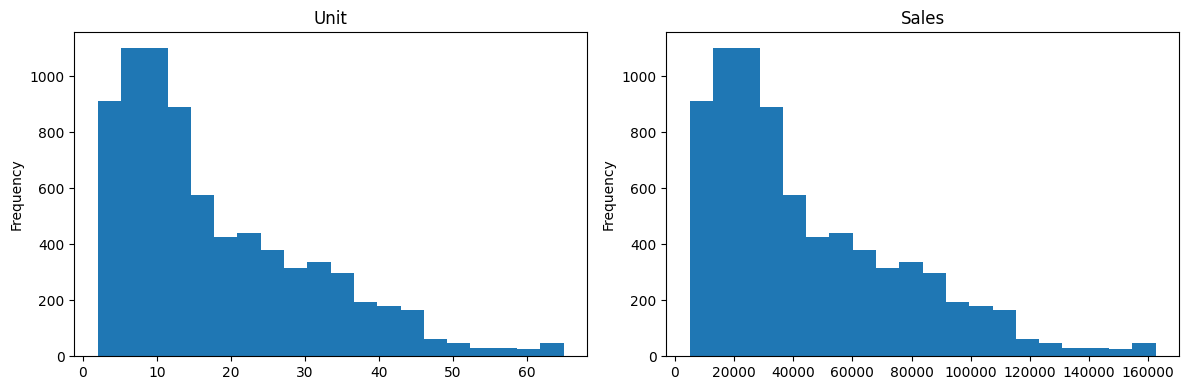

In [73]:
# Plot histogram of sales and Unit data side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sales_df['Unit'].plot(kind='hist', bins=20, title='Unit', ax=axes[0])
sales_df['Sales'].plot(kind='hist', bins=20, title='Sales', ax=axes[1])
plt.tight_layout()
plt.show()

**Observations**
*   The Distribution of Unit and Sales is identical - Does this mean the price of each is same?
*   The distribution is not Gaussian
*   Both are right skewed data (positively skewed data) with long tail on the right







In [74]:
# Find the price of each item sold
sales_df['Price'] = sales_df['Sales'] / sales_df['Unit']
print(sales_df)

             Date        Time State     Group  Unit  Sales   Price
0      1-Oct-2020     Morning    WA      Kids     8  20000  2500.0
1      1-Oct-2020     Morning    WA       Men     8  20000  2500.0
2      1-Oct-2020     Morning    WA     Women     4  10000  2500.0
3      1-Oct-2020     Morning    WA   Seniors    15  37500  2500.0
4      1-Oct-2020   Afternoon    WA      Kids     3   7500  2500.0
...           ...         ...   ...       ...   ...    ...     ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000  2500.0
7556  30-Dec-2020     Evening   TAS      Kids    15  37500  2500.0
7557  30-Dec-2020     Evening   TAS       Men    15  37500  2500.0
7558  30-Dec-2020     Evening   TAS     Women    11  27500  2500.0
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500  2500.0

[7560 rows x 7 columns]


**Observation:**

Yes, the price of each item is same


**3.3.4 Identify Data Wrangling Technique**

*   Standardization - Data rescaled such that mean is 0 and standard deviation is 1. Good technique for Normally distributed data
*   Normalization - Data rescaled between 0 to 1 or -1 to +1 depending on min/max values of the data

Its already recommended that Normalization is the preferred approach for this problem
The data is not normally distributed - Normalization should be the approach. But why do we need it?  


In [75]:
# Normalize the Unit and Sales data

# Initialize the scaler
scaler = MinMaxScaler()

# Fit to data, then transform it
sales_df['Unit_Norm_MinMax'] = scaler.fit_transform(sales_df[['Unit']])
sales_df['Sales_Norm_MinMax'] = scaler.fit_transform(sales_df[['Sales']])

print(sales_df)
sales_df.describe()


             Date        Time State     Group  Unit  Sales   Price  \
0      1-Oct-2020     Morning    WA      Kids     8  20000  2500.0   
1      1-Oct-2020     Morning    WA       Men     8  20000  2500.0   
2      1-Oct-2020     Morning    WA     Women     4  10000  2500.0   
3      1-Oct-2020     Morning    WA   Seniors    15  37500  2500.0   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500  2500.0   
...           ...         ...   ...       ...   ...    ...     ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000  2500.0   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500  2500.0   
7557  30-Dec-2020     Evening   TAS       Men    15  37500  2500.0   
7558  30-Dec-2020     Evening   TAS     Women    11  27500  2500.0   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500  2500.0   

      Unit_Norm_MinMax  Sales_Norm_MinMax  
0             0.095238           0.095238  
1             0.095238           0.095238  
2             0.031746     

,Unit,Sales,Price,Unit_Norm_MinMax,Sales_Norm_MinMax
count,7560.000000,7560.000000,7560.0,7560.000000,7560.000000
mean,18.005423,45013.558201,2500.0,0.254054,0.254054
std,12.901403,32253.506944,0.0,0.204784,0.204784
min,2.000000,5000.000000,2500.0,0.000000,0.000000
25%,8.000000,20000.000000,2500.0,0.095238,0.095238
50%,14.000000,35000.000000,2500.0,0.190476,0.190476
75%,26.000000,65000.000000,2500.0,0.380952,0.380952
max,65.000000,162500.000000,2500.0,1.000000,1.000000


**3.3.5 Application of groupby() to gather insight into the data**

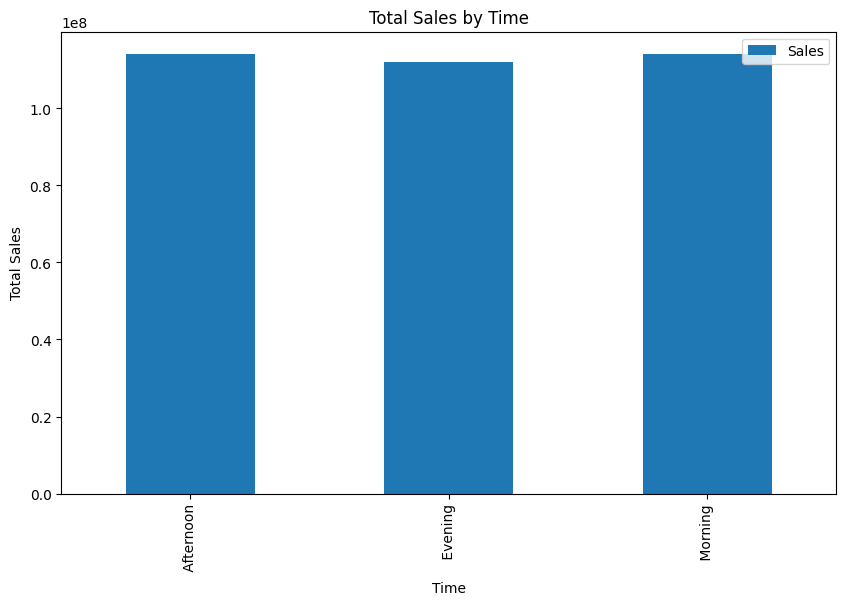

In [76]:
# Apply groupby() on Time and plot the Sales column
sales_df.groupby('Time').agg({'Sales': 'sum'}).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.title('Total Sales by Time')
plt.show()

**Observation**


*   The barplots are of similar height
*   Dificult to distinguish which bar plot is bigger
*   Total Sales is a very large number
*   Might benefit **by** using normalized Sales Data here





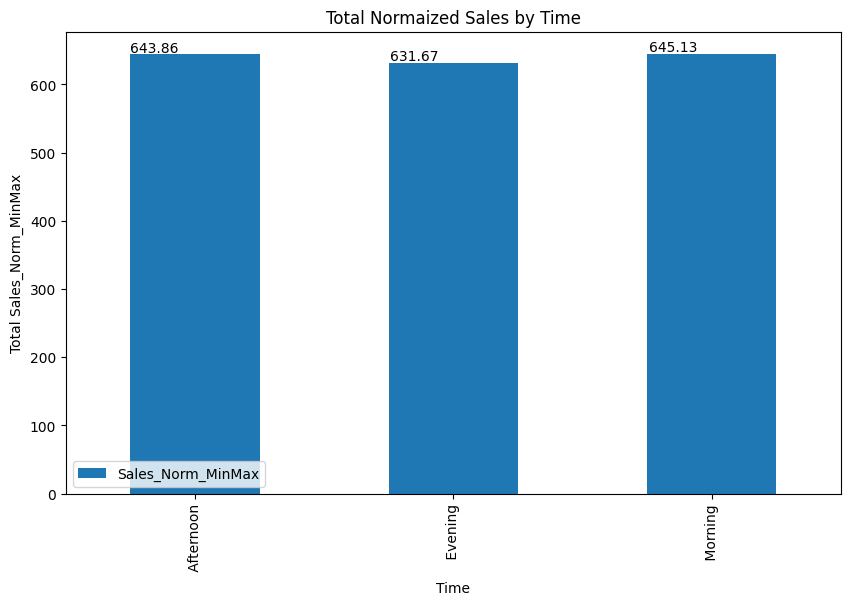

In [77]:
# Group by Group and aggregate Sales by sum
grouped_sales = sales_df.groupby('Time').agg({'Sales_Norm_MinMax': 'sum'})

# Plot the aggregated sales data as a bar chart
ax = grouped_sales.plot(kind='bar', figsize=(10, 6))

# Annotate the bar plot with maximum sales values
for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))


plt.xlabel('Time')
plt.ylabel('Total Sales_Norm_MinMax')
plt.title('Total Normaized Sales by Time')
plt.show()

**Observations**:


*   Sale is maximum in the morning, closely followed by sale in afternoon
*   Sale is minimum in the Evening



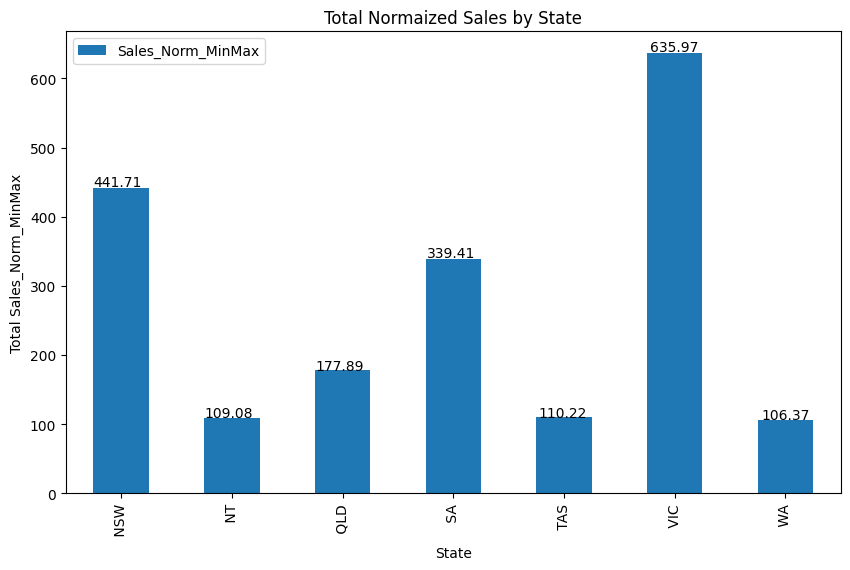

In [78]:
# Group by State and aggregate Sales by sum
grouped_sales = sales_df.groupby('State').agg({'Sales_Norm_MinMax': 'sum'})

# Plot the aggregated sales data as a bar chart
ax = grouped_sales.plot(kind='bar', figsize=(10, 6))

# Annotate the bar plot with maximum sales values
for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))


plt.xlabel('State')
plt.ylabel('Total Sales_Norm_MinMax')
plt.title('Total Normaized Sales by State')
plt.show()

**Observation:**


*   Maximum sales coming from the State VIC
*   Minimum sales comimg from the State WA
*   States WA, NT, TAS, QLD lagging in sales

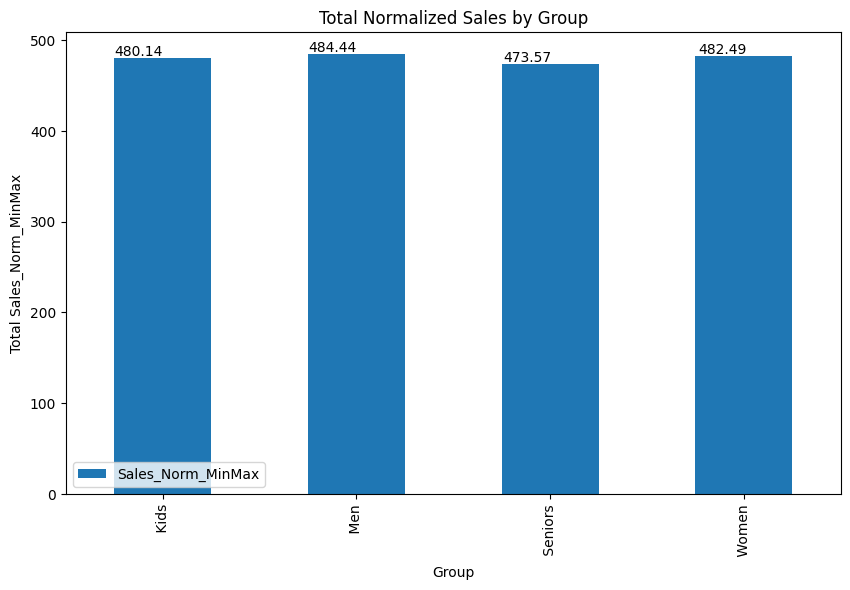

In [79]:
# Group by Group and aggregate Sales by sum
grouped_sales = sales_df.groupby('Group').agg({'Sales_Norm_MinMax': 'sum'})

# Plot the aggregated sales data as a bar chart
ax = grouped_sales.plot(kind='bar', figsize=(10, 6))

# Annotate the bar plot with maximum sales values
for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))


plt.xlabel('Group')
plt.ylabel('Total Sales_Norm_MinMax')
plt.title('Total Normalized Sales by Group')
plt.show()

**Observation:**



*   Maximum sales comes from Men's clothes, followed by Women clothes and Kids Clothes
*   Minimum sales comes from Senior clothing



<Axes: xlabel='State'>

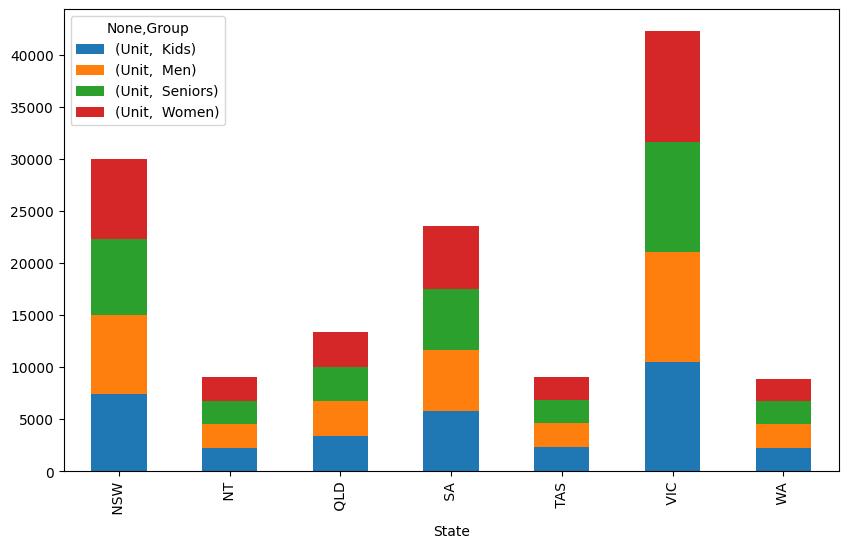

In [80]:
# Apply groupby to stack the Group sold in each state, color code the groups for each state
sales_df.groupby(['State', 'Group']).agg({'Unit': 'sum'}).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))


**Observations**



*   The sale of clothes for each group (Kids, Men, Women, Senior) is almost equally distributed in each state
*   Dificult to understand from this plot



<Axes: xlabel='Group'>

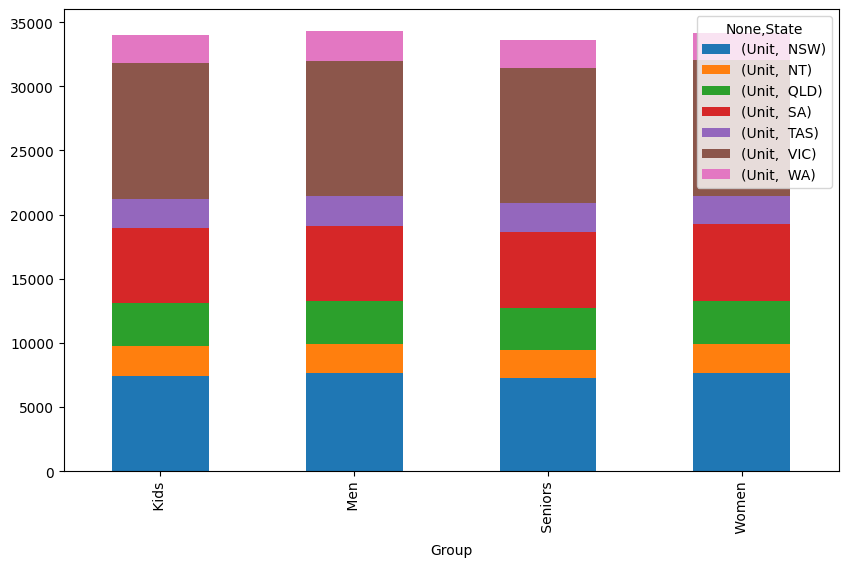

In [81]:
# Apply groupby to stack the Group sold in each state, color code the groups for each state
sales_df.groupby(['Group', 'State']).agg({'Unit': 'sum'}).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='Group'>

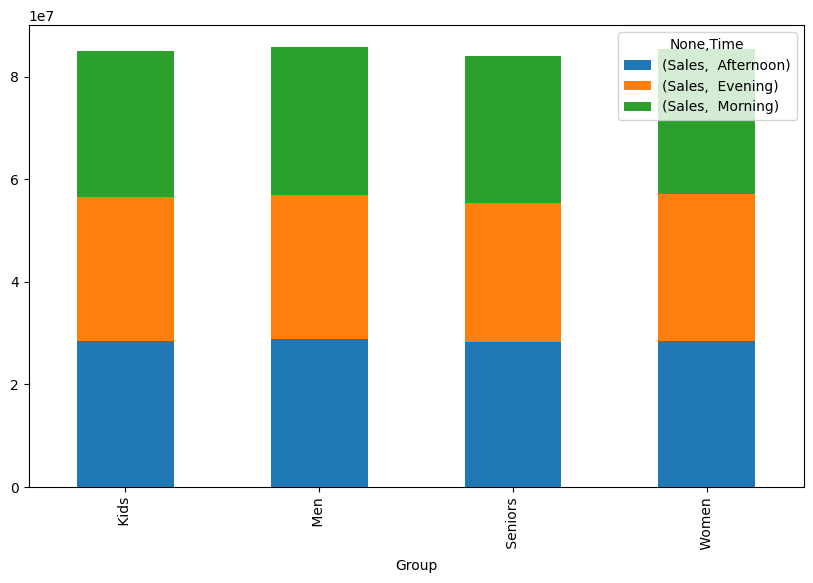

In [82]:
# Apply groupby to stack the Group sold in differnt Time of the day, color code the groups for time
sales_df.groupby(['Group', 'Time']).agg({'Sales': 'sum'}).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
#Normalize the sales by time


<Axes: xlabel='State'>

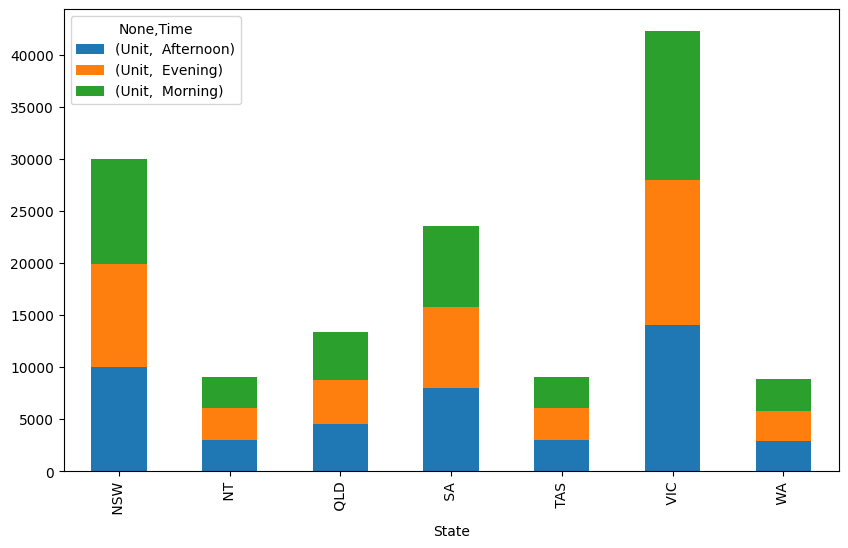

In [83]:
# Apply groupby to stack the Time sold in each state, color code the Time for each state
sales_df.groupby(['State', 'Time']).agg({'Unit': 'sum'}).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='Time'>

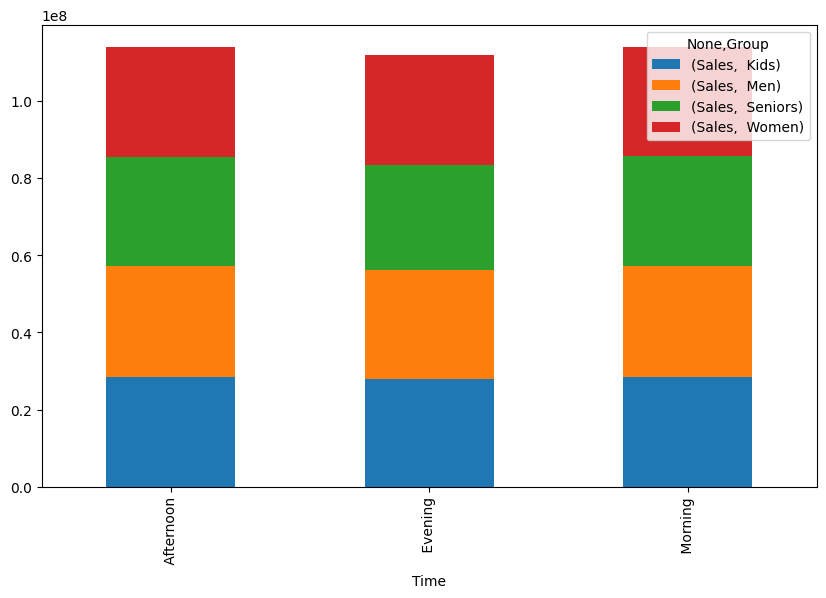

In [84]:
# Apply groupby to stack the Group sold in differnt Time of the day, color code the groups for time
sales_df.groupby(['Time', 'Group']).agg({'Sales': 'sum'}).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
#Normalize the sales by time

**Observation**

*   None of the above plots are explaining the data
*   Dificult to distinguish trend



([0, 1, 2],
 [Text(0, 0, ' Afternoon'), Text(1, 0, ' Evening'), Text(2, 0, ' Morning')])

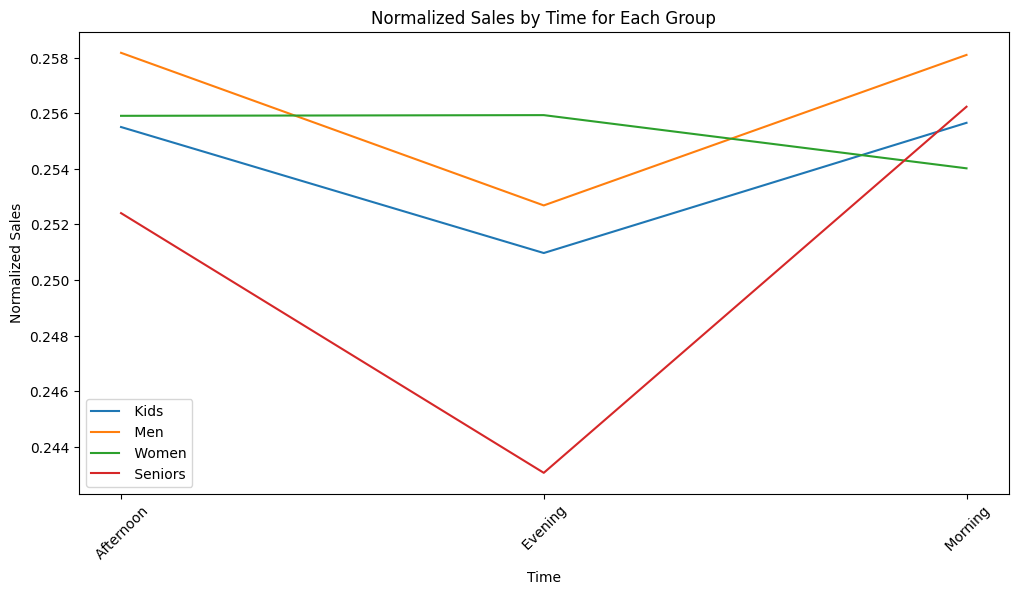

In [85]:
# Group by Time and plot normalized sales data for each Group
plt.figure(figsize=(12, 6))
for group in sales_df['Group'].unique():
  group_data = sales_df[sales_df['Group'] == group]
  group_data_time = group_data.groupby('Time')['Sales_Norm_MinMax'].mean()
  plt.plot(group_data_time.index, group_data_time.values, label=group)

plt.xlabel('Time')
plt.ylabel('Normalized Sales')
plt.title('Normalized Sales by Time for Each Group')
plt.legend()
plt.xticks(rotation=45)


**Observation**


*   Average sales of Women clothing is higher in the Evening
*   Average sales of Men clothing is higher in the Morning and Afternoon
*   Average Sales of Senior is higher in the Morning
*   Average sales of Kids clothing is higher in Morning and Evening





# **3.4 Data Analysis**

In [86]:
# Recomend display of data sales_df
sales_df.head()

,Date,Time,State,Group,Unit,Sales,Price,Unit_Norm_MinMax,Sales_Norm_MinMax
0,1-Oct-2020,Morning,WA,Kids,8,20000,2500.0,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,2500.0,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,2500.0,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,2500.0,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,2500.0,0.015873,0.015873


**3.4.1 Descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis**


In [87]:
# Data Analysis on Sales and Units
# Mean , std and Quartiles
sales_df[['Sales', 'Unit']].describe()


,Sales,Unit
count,7560.000000,7560.000000
mean,45013.558201,18.005423
std,32253.506944,12.901403
min,5000.000000,2.000000
25%,20000.000000,8.000000
50%,35000.000000,14.000000
75%,65000.000000,26.000000
max,162500.000000,65.000000


In [88]:
# Median
sales_df[['Sales', 'Unit']].median()

,0
Sales,35000.0
Unit,14.0


In [89]:
# Mode
sales_df[['Sales', 'Unit']].mode()


,Sales,Unit
0,22500,9


**3.4.2 Understanding the Date - Group by Month and Weeks**



In [90]:
#find the month of each item sold
sales_df['Month'] = pd.to_datetime(sales_df['Date']).dt.month
print(sales_df)

             Date        Time State     Group  Unit  Sales   Price  \
0      1-Oct-2020     Morning    WA      Kids     8  20000  2500.0   
1      1-Oct-2020     Morning    WA       Men     8  20000  2500.0   
2      1-Oct-2020     Morning    WA     Women     4  10000  2500.0   
3      1-Oct-2020     Morning    WA   Seniors    15  37500  2500.0   
4      1-Oct-2020   Afternoon    WA      Kids     3   7500  2500.0   
...           ...         ...   ...       ...   ...    ...     ...   
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000  2500.0   
7556  30-Dec-2020     Evening   TAS      Kids    15  37500  2500.0   
7557  30-Dec-2020     Evening   TAS       Men    15  37500  2500.0   
7558  30-Dec-2020     Evening   TAS     Women    11  27500  2500.0   
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500  2500.0   

      Unit_Norm_MinMax  Sales_Norm_MinMax  Month  
0             0.095238           0.095238     10  
1             0.095238           0.095238     10  
2     

In [91]:
# Find the week of each month sold

date = pd.to_datetime(sales_df['Date'])

# Convert the 'Date' column to datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
# Extract the week number from the 'Date' column
sales_df['Week'] = date.dt.isocalendar().week
print(sales_df)


           Date        Time State     Group  Unit  Sales   Price  \
0    2020-10-01     Morning    WA      Kids     8  20000  2500.0   
1    2020-10-01     Morning    WA       Men     8  20000  2500.0   
2    2020-10-01     Morning    WA     Women     4  10000  2500.0   
3    2020-10-01     Morning    WA   Seniors    15  37500  2500.0   
4    2020-10-01   Afternoon    WA      Kids     3   7500  2500.0   
...         ...         ...   ...       ...   ...    ...     ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000  2500.0   
7556 2020-12-30     Evening   TAS      Kids    15  37500  2500.0   
7557 2020-12-30     Evening   TAS       Men    15  37500  2500.0   
7558 2020-12-30     Evening   TAS     Women    11  27500  2500.0   
7559 2020-12-30     Evening   TAS   Seniors    13  32500  2500.0   

      Unit_Norm_MinMax  Sales_Norm_MinMax  Month  Week  
0             0.095238           0.095238     10    40  
1             0.095238           0.095238     10    40  
2           

(array([ 9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75,
        12.  , 12.25]),
 [Text(9.75, 0, '9.75'),
  Text(10.0, 0, '10.00'),
  Text(10.25, 0, '10.25'),
  Text(10.5, 0, '10.50'),
  Text(10.75, 0, '10.75'),
  Text(11.0, 0, '11.00'),
  Text(11.25, 0, '11.25'),
  Text(11.5, 0, '11.50'),
  Text(11.75, 0, '11.75'),
  Text(12.0, 0, '12.00'),
  Text(12.25, 0, '12.25')])

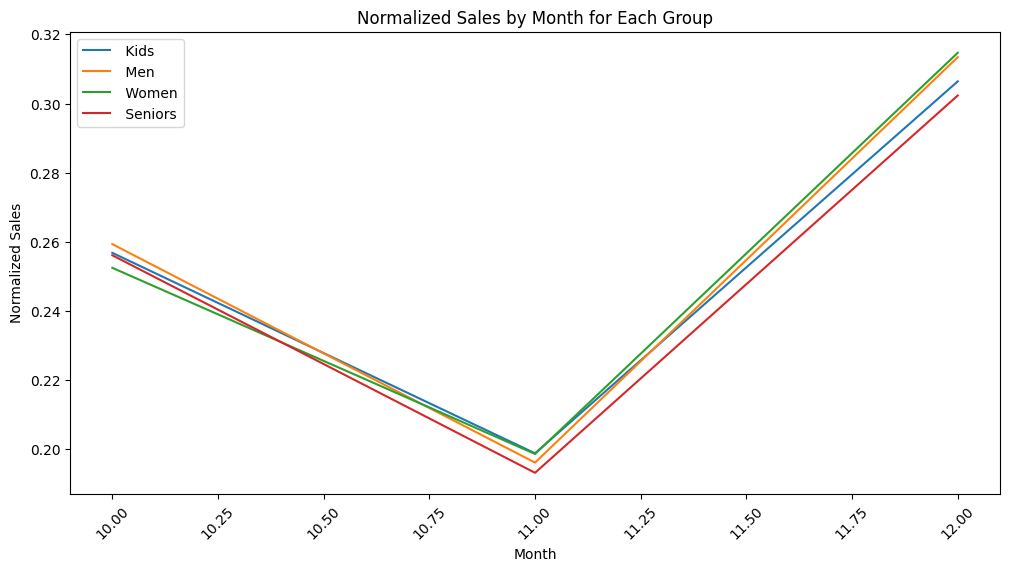

In [92]:
# Group by Month and plot normalized sales data for each Group
plt.figure(figsize=(12, 6))
for group in sales_df['Group'].unique():
  group_data = sales_df[sales_df['Group'] == group]
  group_data_month = group_data.groupby('Month')['Sales_Norm_MinMax'].mean()
  plt.plot(group_data_month.index, group_data_month.values, label=group)

plt.xlabel('Month')
plt.ylabel('Normalized Sales')
plt.title('Normalized Sales by Month for Each Group')
plt.legend()
plt.xticks(rotation=45)

<Axes: xlabel='Month'>

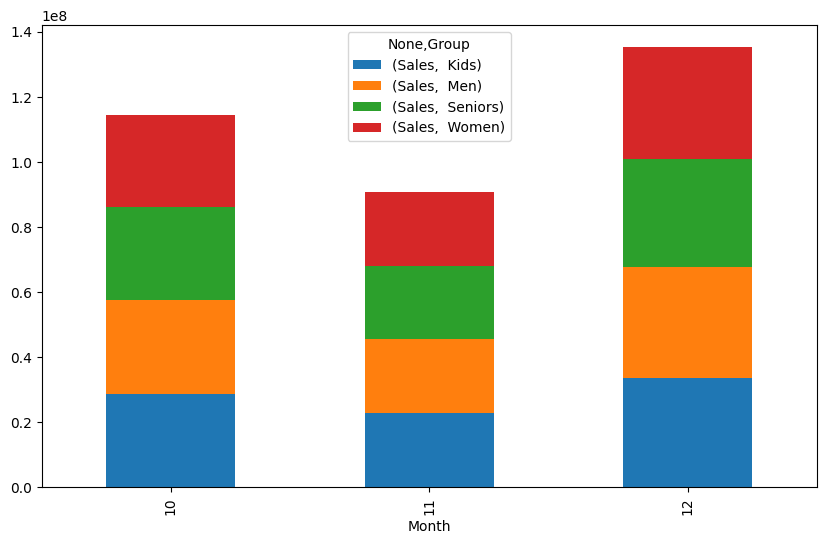

In [93]:
# Apply groupby to stack the Group sold in differnt Month, color code the groups for Month
sales_df.groupby(['Month', 'Group']).agg({'Sales': 'sum'}).unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
#Normalize the sales by time

**Observation**


*   There was a drop in sales in the month of November
*   The sales peaked in the month of December
*   The sales should have steadily increased every month leading to the peak in the Holiday Season - Needed Marketing effort for the month of Novemebr
*   List item





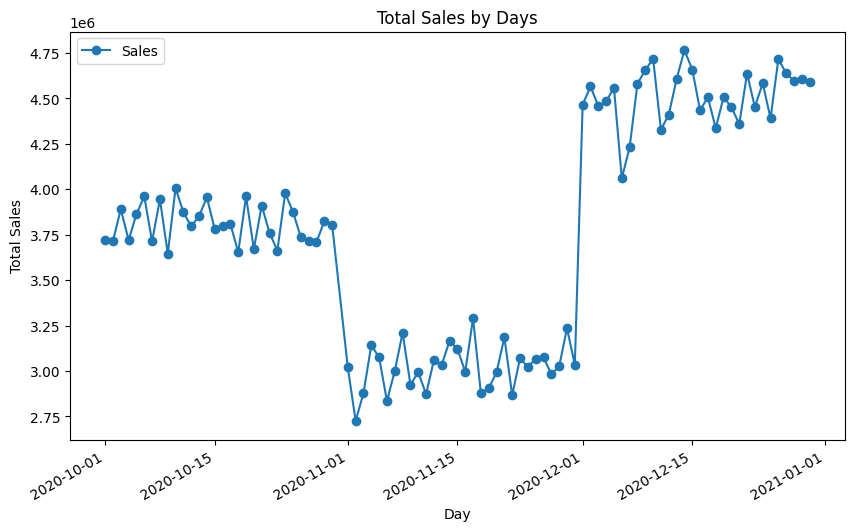

In [94]:
# Plot the sales by Day
sales_df.groupby('Date').agg({'Sales': 'sum'}).plot(kind='line',marker='o', figsize=(10, 6))
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Days')
plt.show()



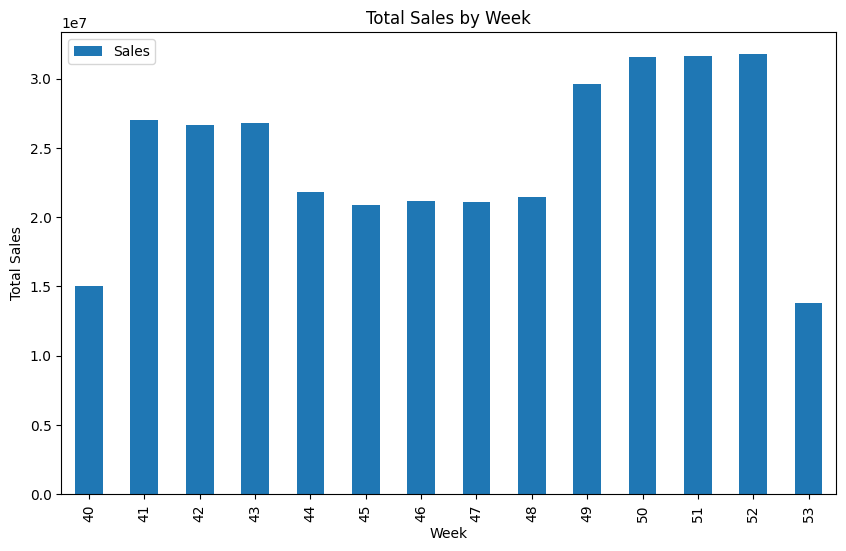

In [95]:
# Plot the sales by week
sales_df.groupby('Week').agg({'Sales': 'sum'}).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.title('Total Sales by Week')
plt.show()

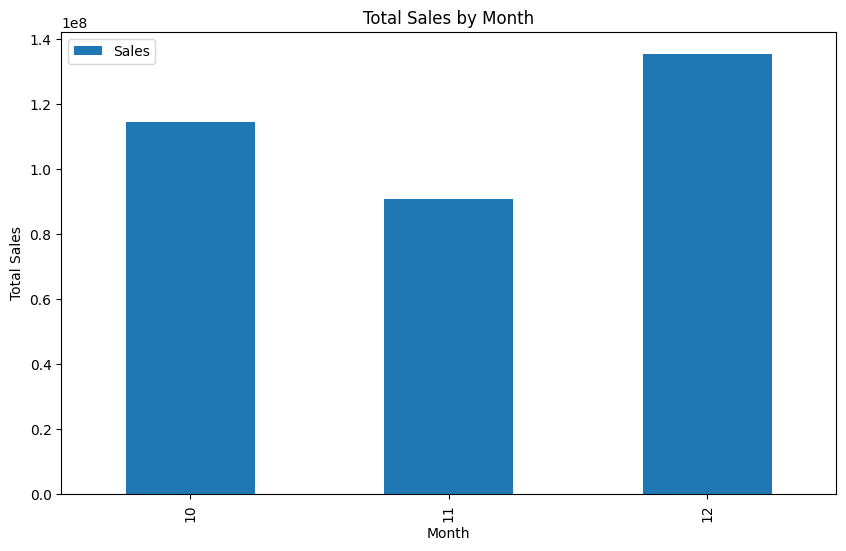

In [96]:
# Plot the sales by Month
sales_df.groupby('Month').agg({'Sales': 'sum'}).plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.show()

In [97]:
# calculate IQR for column Sales
Q1 = sales_df['Sales'].quantile(0.25)
Q3 = sales_df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = sales_df[(sales_df['Sales'] < Q1 - threshold * IQR) | (sales_df['Sales'] > Q3 + threshold * IQR)]
print(outliers)

           Date        Time State     Group  Unit   Sales   Price  \
5082 2020-12-01   Afternoon   VIC     Women    63  157500  2500.0   
5083 2020-12-01   Afternoon   VIC   Seniors    62  155000  2500.0   
5161 2020-12-02     Morning   VIC       Men    56  140000  2500.0   
5162 2020-12-02     Morning   VIC     Women    59  147500  2500.0   
5169 2020-12-02     Evening   VIC       Men    64  160000  2500.0   
...         ...         ...   ...       ...   ...     ...     ...   
7432 2020-12-29   Afternoon   VIC      Kids    65  162500  2500.0   
7433 2020-12-29   Afternoon   VIC       Men    54  135000  2500.0   
7437 2020-12-29     Evening   VIC       Men    54  135000  2500.0   
7515 2020-12-30     Morning   VIC   Seniors    65  162500  2500.0   
7519 2020-12-30   Afternoon   VIC   Seniors    62  155000  2500.0   

      Unit_Norm_MinMax  Sales_Norm_MinMax  Month  Week  
5082          0.968254           0.968254     12    49  
5083          0.952381           0.952381     12    49  


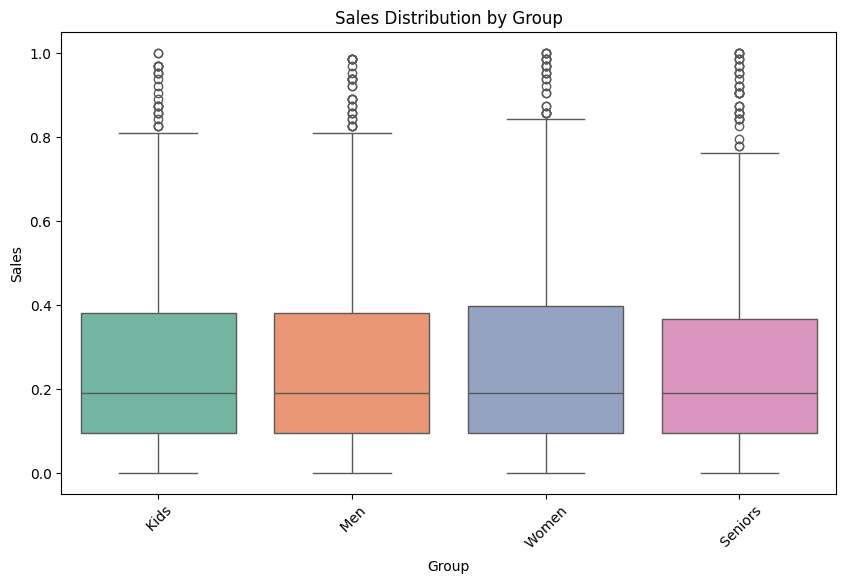

In [98]:
import seaborn as sns

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Sales_Norm_MinMax', data=sales_df, palette='Set2')
plt.title('Sales Distribution by Group')
plt.xlabel('Group')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


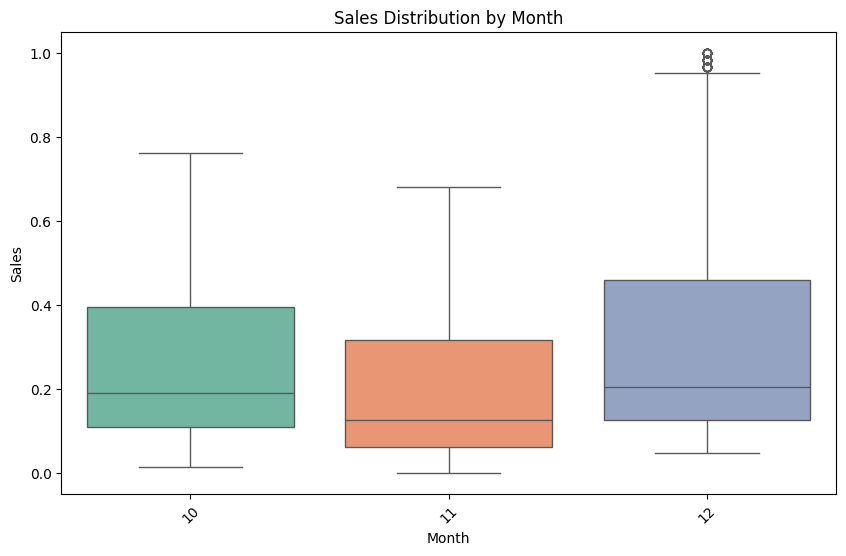

In [99]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Sales_Norm_MinMax', data=sales_df, palette='Set2')
plt.title('Sales Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


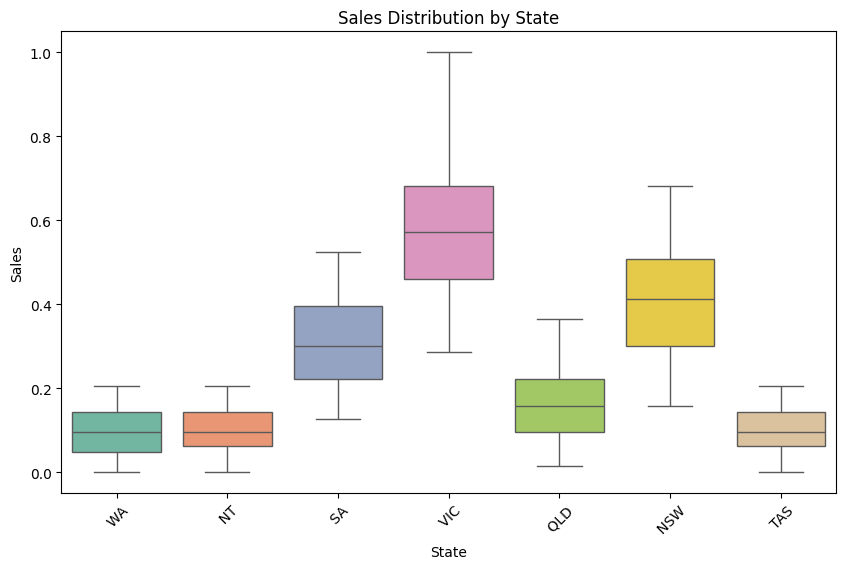

In [100]:
# Create a box plot of Sales for the Quarter
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Sales_Norm_MinMax', data=sales_df, palette='Set2')
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

In [101]:
# Create a box plot of Sales for the Months
#sales_df.head()
sales_df_month_10 = sales_df[sales_df['Month'] == 10]
sales_df_month_11 = sales_df[sales_df['Month'] == 11]
sales_df_month_12 = sales_df[sales_df['Month'] == 12]


In [102]:
print(sales_df_month_10['Month'].unique())

[10]


Text(0, 0.5, 'Sales')

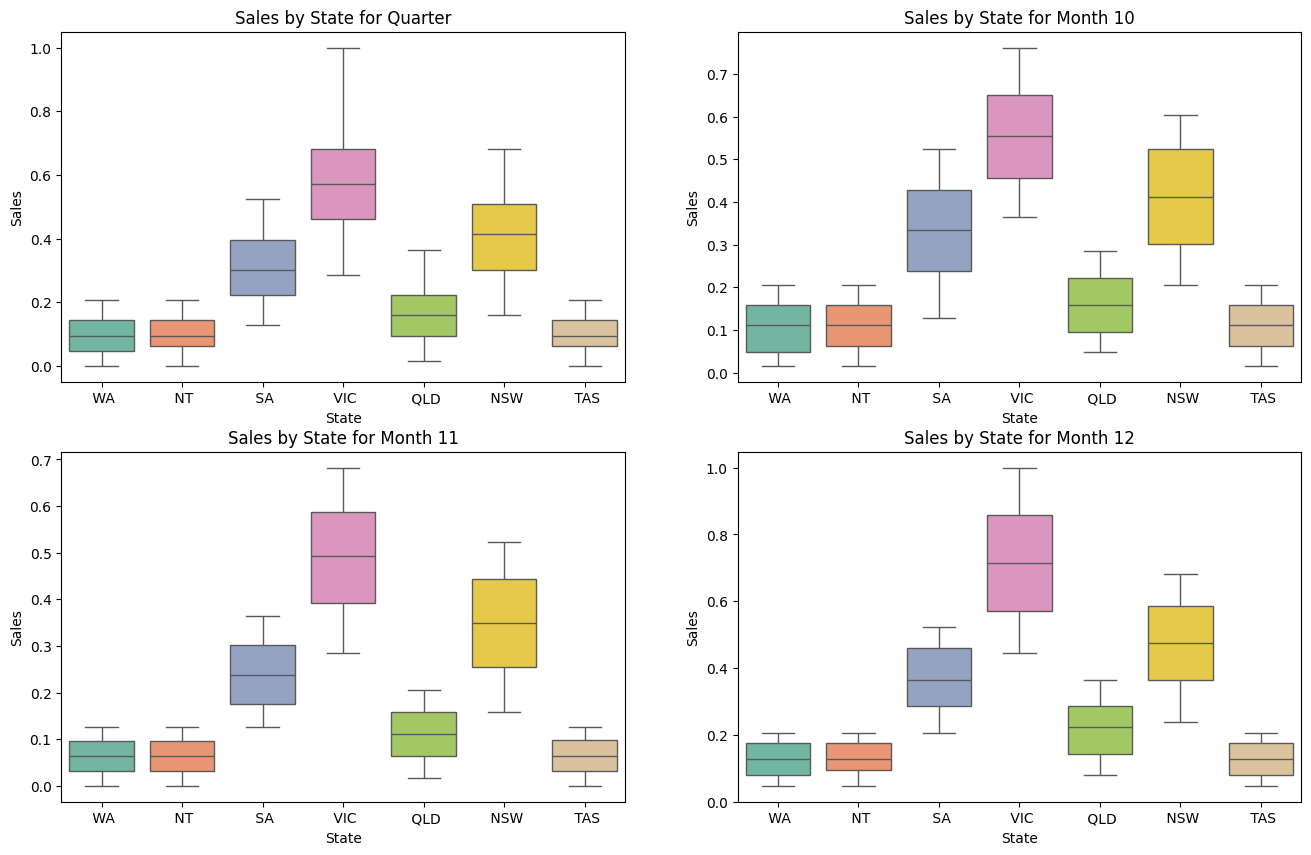

In [103]:
# Create a box plot of Sales for the Months
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

sns.boxplot(x='State', y='Sales_Norm_MinMax', data=sales_df, palette='Set2',ax=axes[0,0])
axes[0,0].set_title('Sales by State for Quarter')
axes[0,0].set_xlabel('State')
axes[0,0].set_ylabel('Sales')

sns.boxplot(x='State', y='Sales_Norm_MinMax', data=sales_df_month_10, palette='Set2',ax=axes[0,1])
axes[0,1].set_title('Sales by State for Month 10')
axes[0,1].set_xlabel('State')
axes[0,1].set_ylabel('Sales')
#axes[0,1].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.boxplot(x='State', y='Sales_Norm_MinMax', data=sales_df_month_11, palette='Set2',ax=axes[1,0])
axes[1,0].set_title('Sales by State for Month 11')
axes[1,0].set_xlabel('State')
axes[1,0].set_ylabel('Sales')
#axes[1,0].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

sns.boxplot(x='State', y='Sales_Norm_MinMax', data=sales_df_month_12, palette='Set2',ax=axes[1,1])
axes[1,1].set_title('Sales by State for Month 12')
axes[1,1].set_xlabel('State')
axes[1,1].set_ylabel('Sales')
#axes[1,1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)




In [104]:
# Find max sales data for each Group
max_sales_group = sales_df.groupby('Group')['Sales'].max()
print(max_sales_group)

Group
Kids       162500
Men        160000
Seniors    162500
Women      162500
Name: Sales, dtype: int64


In [105]:
#Find max sales data by State
max_sales_state = sales_df.groupby('State')['Sales'].max()
print(max_sales_state)

State
NSW    112500
NT      37500
QLD     62500
SA      87500
TAS     37500
VIC    162500
WA      37500
Name: Sales, dtype: int64


In [106]:
#Find max sales data by Month
max_sales_month = sales_df.groupby('Month')['Sales'].max()
print(max_sales_month)

Month
10    125000
11    112500
12    162500
Name: Sales, dtype: int64


In [107]:
#Find max sales data by Week
max_sales_week = sales_df.groupby('Week')['Sales'].max()
print(max_sales_week)

Week
40    125000
41    125000
42    125000
43    125000
44    125000
45    112500
46    112500
47    112500
48    112500
49    162500
50    162500
51    162500
52    162500
53    162500
Name: Sales, dtype: int64


### **4.0 Dashboard**

    4.1 State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
    4.2 Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
    4.3 Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

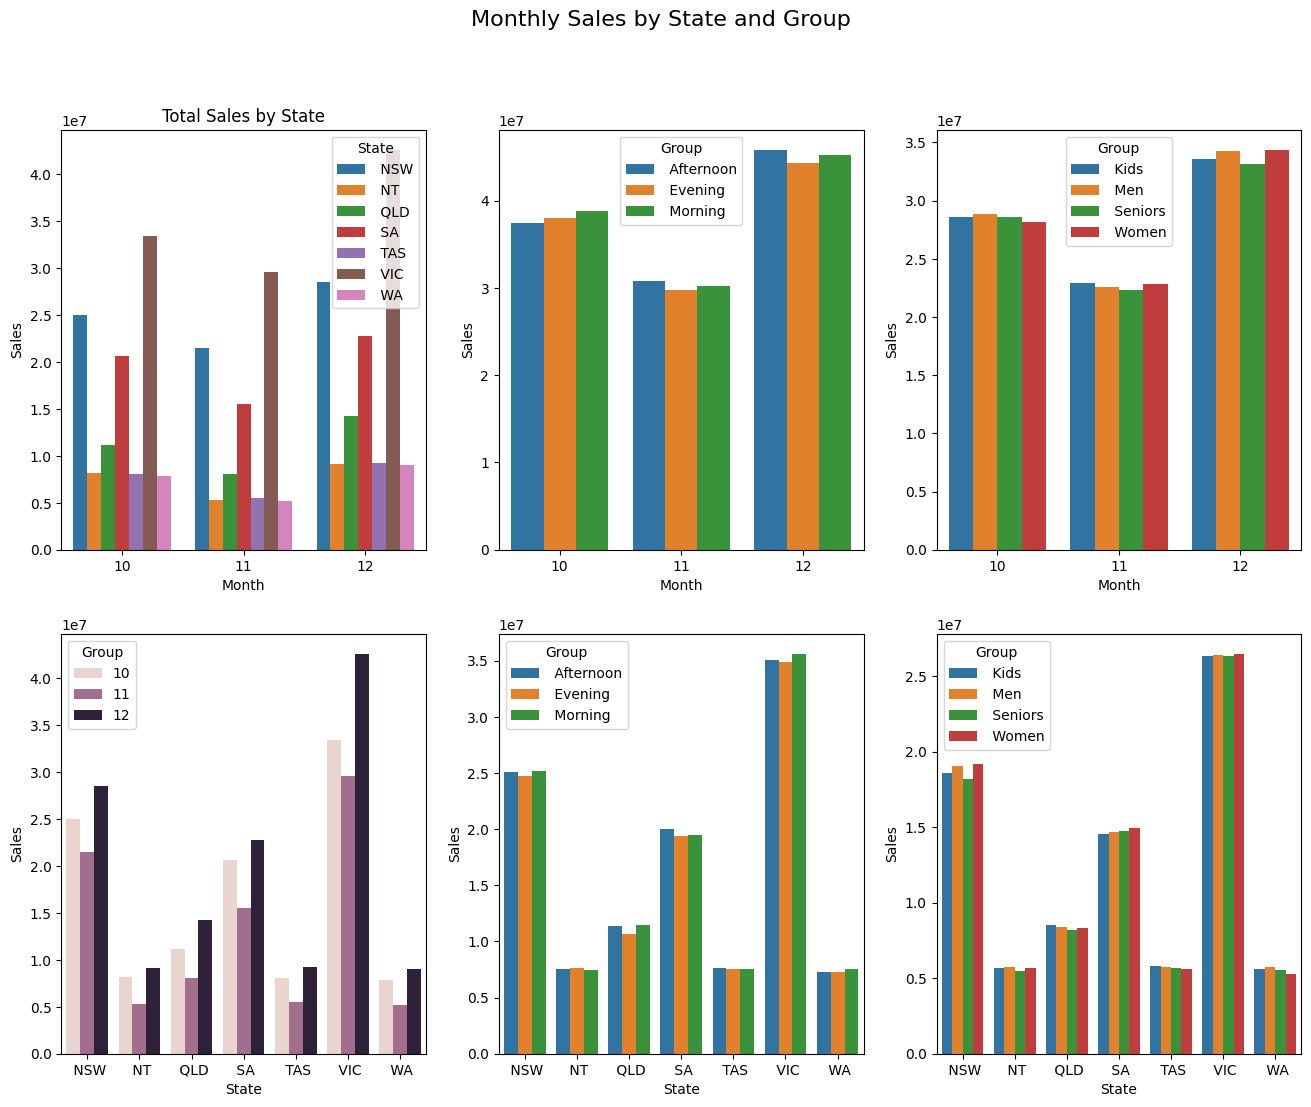

In [108]:
# Group by Month and State
monthly_state_summary = sales_df.groupby(['Month', 'State'])[['Sales', 'Unit']].sum().reset_index()

# Group by Month and Product Group
monthly_group_summary = sales_df.groupby(['Month', 'Group'])[['Sales', 'Unit']].sum().reset_index()

# Group by Month and Time
monthly_time_summary = sales_df.groupby(['Month', 'Time'])[['Sales', 'Unit']].sum().reset_index()

# Group by Month and Product Group
stately_group_summary = sales_df.groupby(['State', 'Group'])[['Sales', 'Unit']].sum().reset_index()

# Group by Month and Product Group
stately_time_summary = sales_df.groupby(['State', 'Time'])[['Sales', 'Unit']].sum().reset_index()

# Group by Month and Product Group
grouply_time_summary = sales_df.groupby(['Group', 'Time'])[['Sales', 'Unit']].sum().reset_index()

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
fig.suptitle('Monthly Sales by State and Group', fontsize=16)

# Top-left: Sales by State
sns.barplot(data=monthly_state_summary, x='Month', y='Sales', hue='State', ax=axes[0,0])
axes[0,0].set_title('Total Sales by State')
axes[0,0].legend(title='State')

# Top-Right: Sales by Product Group
sns.barplot(data=monthly_time_summary, x='Month', y='Sales', hue='Time', ax=axes[0,1])
axes[0,1].legend(title='Group')

# Top-Right: Sales by Product Group
sns.barplot(data=monthly_group_summary, x='Month', y='Sales', hue='Group', ax=axes[0,2])
axes[0,2].legend(title='Group')

# Top-Right: Sales by Product Group
sns.barplot(data=monthly_state_summary, x='State', y='Sales', hue='Month', ax=axes[1,0])
axes[1,0].legend(title='Group')

# Top-Right: Sales by Product Group
sns.barplot(data=stately_time_summary, x='State', y='Sales', hue='Time', ax=axes[1,1])
axes[1,1].legend(title='Group')

# Top-Right: Sales by Product Group
sns.barplot(data=stately_group_summary, x='State', y='Sales', hue='Group', ax=axes[1,2])
axes[1,2].legend(title='Group')

# Improve layout
plt.show()



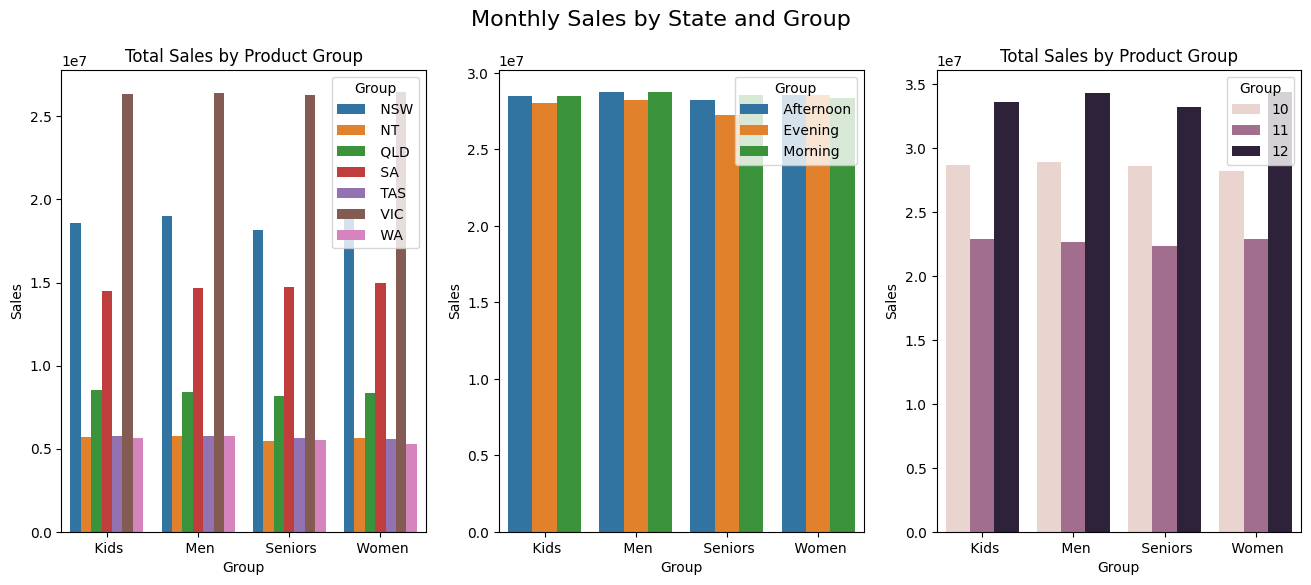

In [109]:
# Group by Month and Product Group
grouply_month_summary = sales_df.groupby(['Group', 'Month'])[['Sales', 'Unit']].sum().reset_index()

# Group by Group and State
stately_group_summary = sales_df.groupby(['Group', 'State'])[['Sales', 'Unit']].sum().reset_index()

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Monthly Sales by State and Group', fontsize=16)

# Top-Right: Sales by Product Group
sns.barplot(data=stately_group_summary, x='Group', y='Sales', hue='State', ax=axes[0])
axes[0].set_title('Total Sales by Product Group')
axes[0].legend(title='Group')

# Top-Right: Sales by Product Group
sns.barplot(data=grouply_time_summary, x='Group', y='Sales', hue='Time', ax=axes[1])
axes[1].legend(title='Group')

# Top-Right: Sales by Product Group
sns.barplot(data=grouply_month_summary, x='Group', y='Sales', hue='Month', ax=axes[2])
axes[2].set_title('Total Sales by Product Group')
axes[2].legend(title='Group')

Text(0.5, 1.0, 'Total Sales by Days')

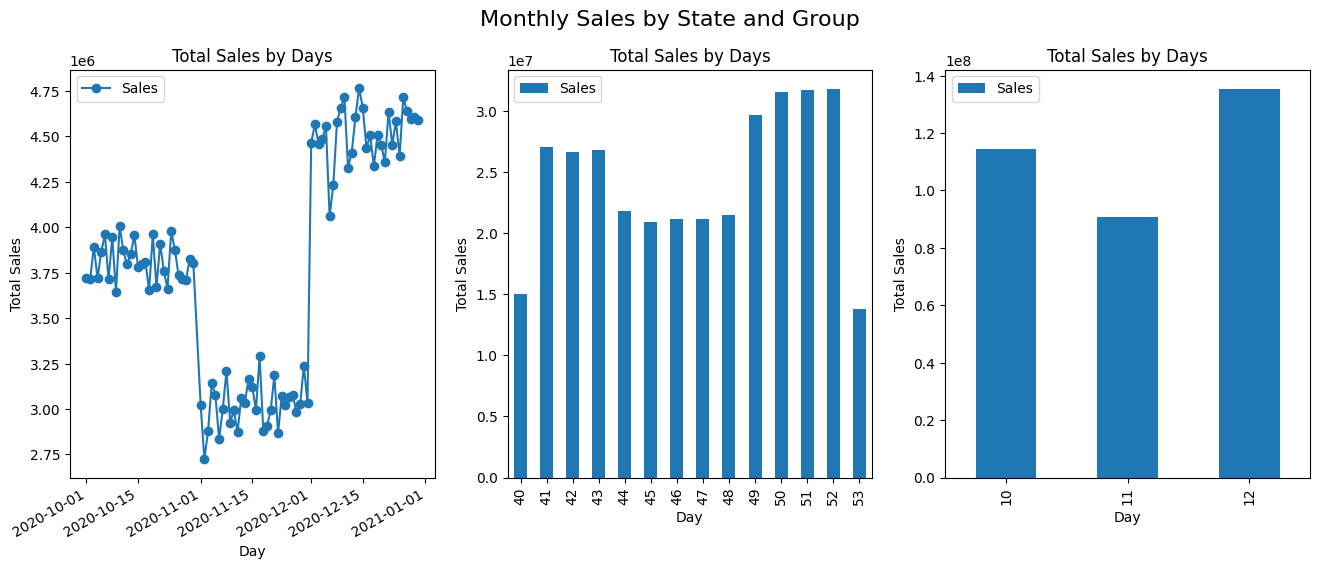

In [110]:
# Set up the 2x2 subplot grid
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
fig.suptitle('Monthly Sales by State and Group', fontsize=16)

# Plot the sales by Day
sales_df.groupby('Date').agg({'Sales': 'sum'}).plot(kind='line',marker='o',ax=axes[0])
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Total Sales')
axes[0].set_title('Total Sales by Days')


# Plot the sales by week
sales_df.groupby('Week').agg({'Sales': 'sum'}).plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Total Sales')
axes[1].set_title('Total Sales by Days')


# Plot the sales by Month
sales_df.groupby('Month').agg({'Sales': 'sum'}).plot(kind='bar',ax=axes[2])
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Total Sales')
axes[2].set_title('Total Sales by Days')



## **5.0 Observations and Recommendations**

# **Sales by States**#
*   States with higher sales are VIC, NSW.  
*   States with moderate sales are SA and QLD
*   States with Lower sales are NT, TAS, WA.

**Recommendation**

*   Need Increased Marketing effort in states NT, TAS, WA
*   Add advertisement to promote the location / presence of brand in those states

# **Sales by Months**#
*   Month of December seen highest sales. Its because of the holiday season
*   Month of November seen a dip in sales. The sales should have gradually increased from October to December. Missed opportunity

**Recommendation**

*   Need Seasonal Sales and promotional offers to increase sales in the month od Nov leading to the holiday season. Seasonal Advertisement campaign for 2 months needed.

# **Sales by Groups**#

*   The difference in sales between the Groups(Men, Women, Kids and Senior) are minimal
*  Men and Women have slightly higher sales number than Kids and Senior
*   Looks like missed opportunity for sales for Women and Kids apparel

**Recommendation**
*   Need Marketing efforts targeted towards Kids and Women. Advertisement Campaign needed to introduce targeted advertisement in terms of pictures and mannequin dress up targetted for this demography

# **Sales by Time of the Day**#
*   There is a dip in sales in the Evening for the demography of Men, Senior and Kids
*   Sales of Men and Kids follow a pattern over the time of the day

**Recommendation**
*   Provide combination sales promotions such as by one adult, get 50% off on Kids apparel to promote sell of other apparel
*   Arrange attraction events (prize giveout every 15 minutes) to draw in crowd in the evening to promote sales











